In [7]:
#imported packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

print("packages imported")

packages imported


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem Statement

Model the total sleep duration of 374 people using linear regression, given the number of minutes engaged in physical activity, self-reported stress level (1-10), and self-reported sleep quality (1-10).

# Variables and Parameters

| Symbol | Description | Type | Dimension | Units |
|---|---|---|---|---|
| $Y$ | The total number of hours slept | dependent variable | $T$ | hours |
| $B_0$ | The default sleeping duration $d$ | parameter | $T$ | hours |
| $B_1$ | Regression coefficient for physical activity | parameter | $T$ | hours/minutes |
| $X_1$ | The number of minutes (minutes) engaged in physical activity during the day | independent variable | $T$ | minutes |
| $B_2$ | Regression coefficient for stress level | parameter | $T$ | hours |
| $X_2$ | The (self-reported) stress level experienced | independent variable | 1 |  |
| $B_3$ | Regression coefficient for quality of sleep | parameter | $T$ | hours |
| $X_3$ | The (self-reported) quality of sleep reported on a scale of 1 to 10 | independent variable | 1 |  |
| $\epsilon$ | residual | parameter | $T$ | hours |


# Assumptions and Constraints:

- Other variables that affect sleep duration, such as timezone, room temperature, and diet, are constant.
- Assume that the data comes from 374 people of working age with no sleep-related diseases.
- No other variables affect sleep duration


# Building the Solution:

In [9]:
sleep_data = pd.read_csv('drive/MyDrive/Sleep.csv')
sleep = pd.DataFrame(sleep_data)
sleep.head()
np.max(sleep['Physical_Activity'])

90

In [10]:
X = sleep[['Physical_Activity','Quality','Stress']]
Y = sleep['Duration']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Sun, 30 Nov 2025   Prob (F-statistic):          4.13e-123
Time:                        03:56:59   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6737      0.40

### Table Analyze(Untransformed Data)
Upon building the linear regression model with no feature transformation, we now analyze the summary information. The first piece of information of note is that there is a warning that the condition number is large. We know from class that this indicates there might be linearly dependent features. Additionally the $R^2$ and $R^2_{adj}$ are both relatively high and this indicates that most of the variance in the target variable (sleep duration) can be explained by the features of the model which is good. Finally we see that the regression coefficient value for physical activity is near $0$, this could indicate that either physical activity is not a good predictor of our target variable or that the physical activity is not on the same scale as the rest of the data. From these facts alone it is not enough to conclude wherther or not this is a good linear model, to futher assess its validity, we now examine whether the three core assumptions of linear regression are satisfied.

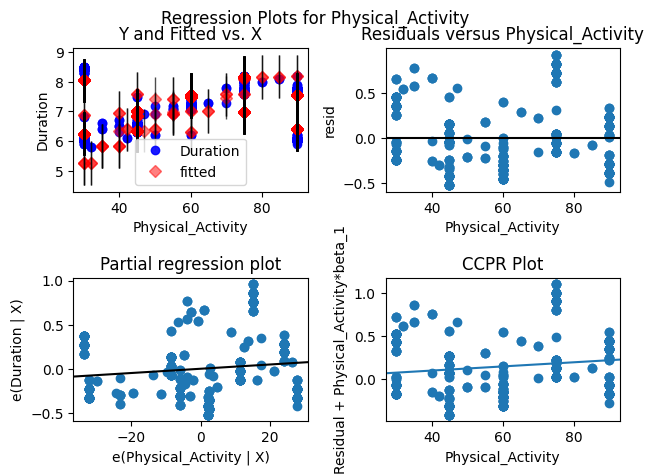

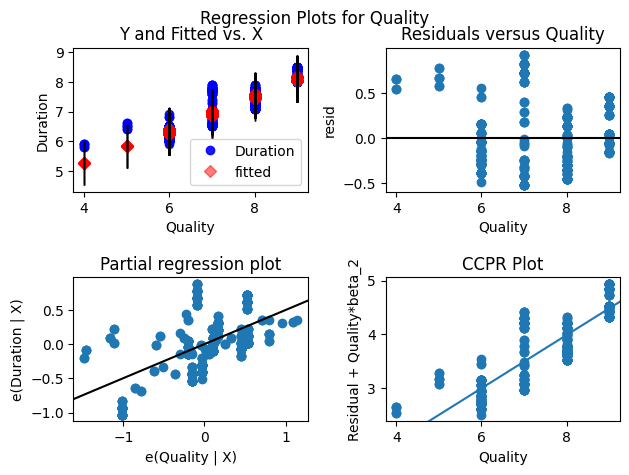

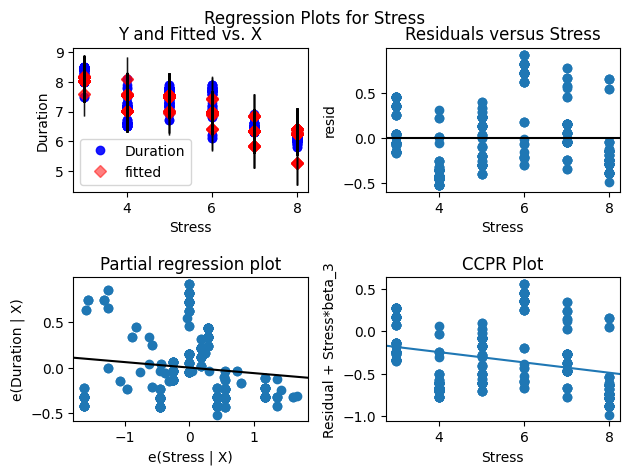

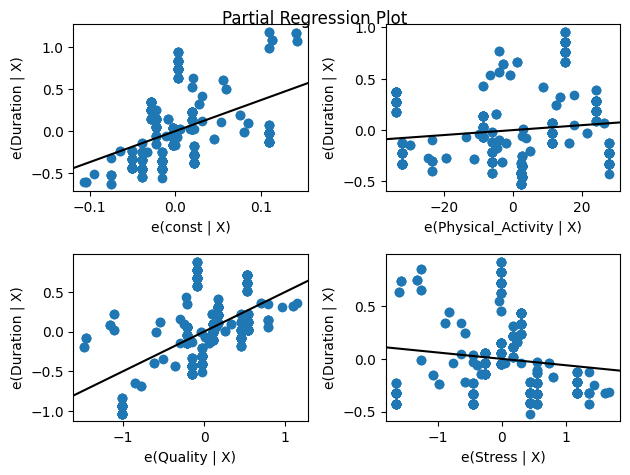

In [11]:
#Assumption: average value of the error is zero.
sm.graphics.plot_regress_exog(reg,"Physical_Activity")
plt.show()

sm.graphics.plot_regress_exog(reg,"Quality")
plt.show()

sm.graphics.plot_regress_exog(reg,"Stress")
plt.show()

## can just have all the partial regression plots together using:
## partial regression plots
sm.graphics.plot_partregress_grid(reg)
plt.show()

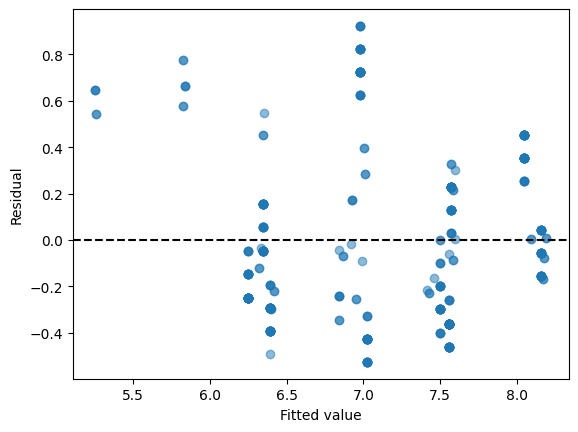

In [19]:
# Assumption variance is constant
fitted_y = reg.fittedvalues

residuals = reg.resid

plt.scatter(fitted_y,residuals,alpha=0.5)
plt.axhline(y=0,color='k',linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

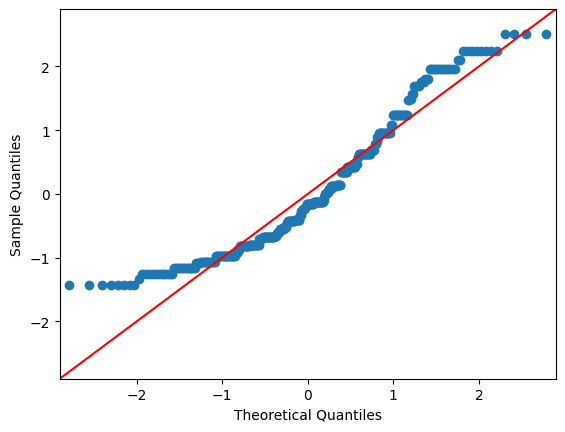

In [13]:
# Assumption: Errors are normally distributed
sm.qqplot(residuals, fit=True, line="45")
plt.show()

# Analysis of Linear Regression Assumptions(Untransformed Data)

## Analysis of the Regression Plots
As we know from class the regression plots are used to evaluate if the first assumption of linear regression is satisfied or not, namely the average value of the error is 0 ($\mathbb{E}(\epsilon_i) = 0, ∀ i$).


#### Residual Plots Analysis
Starting with the analysis of the plot, residuals vs physical activity. We noticed the data violates the condition of being evenly distributed over the $y = 0$ line(with the possible exception of Physical Activity = 90). Next when we looked at residuals vs quality we again noticed some columns of data points not being evenly spread across the $y=0$ line, however this violation wasn't as extreme as in the physical activity plot. Finally we looked at residuals vs stress, we determined this plot actually did satisfy the condition of being evenly distributed over the horizontal axis as needed. However, with two out of the three variables not satisfying the needed condition, we conclude that the residual plots do not satisfy the condition of being evenly distributed over the horizontal axis.
  

#### Partial Regression Plots Analysis
Because the variables take on integer values(from the responses to the survey), the scatter plots show vertical columns of points. This makes it harder to judge whether the covariates exhibit a linear trend, but the overall pattern is still relatively clear. The two covariates that best exhibit a linear trend are "Quality" and the constant term, though even these relations are still pretty weak.  We've concluded that the two covariates namely "Physical_Activity" and "Stress" don't follow a linear trend. Thus with two out of four of the plots being flat out not a linear trend and the other two being somewhat inconclusive we've determined that we have violated this condition as well.

#### Conclusion of Regression Plot Analysis
Since in both cases we have violated our conditions needed for the average value of the error's is 0. Therefore, applying linear regression to the untransformed data violates the first assumption of linear regression.

## Analysis of the Residuals vs Fitted Y's Plot
From class we know that if the residuals vs fitted y's produce a plot that's a random scatter about horizontal axis, then we've satisfied the second assumption of linear regression. Namely that the variance of the error is constant ($Var(\epsilon_i) = \sigma^2,~\forall i$). From our analysis of the plot we observe a clustering of data below the horizontal axis  around fitted values of approximately 6.25 to 7.5, and the overall spread of the residuals is too narrow. This non random structure indicates that the variance is not constant, thus  violating the variance of errors is a constant assumption.

## Analysis of the Normal vs Residuals(QQ) plot
From class we know that if we plot our residuals vs a normal distribution and our points lie along the line $y=x$, then we have satisfied the third assumption of linear regression. Namely that the error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$. We observe that the residuals do not lie on the $y=x$ line but instead they seem to lie on a tilted parabola instead. Hence we conclude that we have violated the third assumption of linear regression as well.

# Conclusion of Linear Regression Assumptions(Untransformed Data)

The untransformed data fails to meet the assumptions required for a valid linear regression model.As a result, we proceed to transforming the data in search of model that satisfies the three assumptions of linear regression.

# Analysis and Assessment: